In [7]:
# Минимальная совместимость с 2.7
from __future__ import division, print_function
# Отключение предупрждений Anaconda
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
class task_1(object):
    '''Task1 class
    n_classes : int
        Number of classes/clusters to sample
        
    n_samples : int
        The total number of points equally divided among clusters.
        
    cluster_std: list of floats
        The standard deviation of the clusters. Making classification not trivial
        
    cmap : {'brg', 'gist_rainbow', 'jet'}
        other cmap possible, but not necessarily good
        
    k_limit: int (default=20)
        Maximum number of neighbours to use in Grid Search'''
    
    def __init__(self, n_classes=5, n_points=300, cluster_std=[0.5, 1, 2, 3, 0.8],
                 cmap='brg', k_limit=20, random_state=None):
        self.__n_classes = n_classes
        self.__n_points = n_points
        
        # avoidning the problem of extra classes for std
        if n_classes > len(cluster_std):
            self.__cluster_std = 2
        else:
            self.__cluster_std = cluster_std
            
        self.__cmap = cmap
        self.__k_limit = k_limit
        self.__random_state = random_state
                
    def __get_mesh_grid(self, eps):
        '''Getting mesh grid for cluster's area visualisation
        eps : float
            mesh grid step'''

        x_min, x_max = self.__data[:, 0].min() - 1, self.__data[:, 0].max() + 1
        y_min, y_max = self.__data[:, 1].min() - 1, self.__data[:, 1].max() + 1
        self.__mesh_xx, self.__mesh_yy = np.meshgrid(np.arange(x_min, x_max, eps), np.arange(y_min, y_max, eps))
        
    def sampling (self):
        '''Data sampling according passed parameters'''
        self.__data, self.__target = make_blobs(n_samples=self.__n_points,
                                            cluster_std=self.__cluster_std,
                                            centers=self.__n_classes,
                                            random_state=self.__random_state)
        
    def __fit_plot_clusters_area(self, k=1):
        '''Fitting Knn with k neighbours and ploting the result'''

        knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1).fit(self.__data, self.__target)
        predicted = knn.predict(np.c_[self.__mesh_xx.ravel(), self.__mesh_yy.ravel()]).reshape(self.__mesh_xx.shape)

        plt.title('Knn classification on %d neighbour(s)' %k)
        plt.pcolormesh(self.__mesh_xx, self.__mesh_yy, predicted, cmap=self.__cmap)
        plt.scatter(self.__data[:, 0],
                    self.__data[:, 1],
                    c=self.__target, s=100,
                    cmap=self.__cmap, edgecolors='black', linewidth=1.5);
        plt.show()
    
    def cluster_visualisation(self, ks=[1, 5, 10], eps=0.1):
        '''Plotting cluster areas for Knn fitted with n_neibours from ks
        ks : list of int
            n_neighbours parameter for Knn'''
        
        self.__get_mesh_grid(eps)
        
        for k in ks:
            self.__fit_plot_clusters_area(k)
        
    def searching_best_knn (self):
        '''Launching Grid Search CV for Knn and plotting accuracy per k'''

        k_neighbours_list = list(range(1, self.__k_limit + 1))

        GS_Knn = GridSearchCV(KNeighborsClassifier(n_jobs=-1),
                              param_grid={'n_neighbors': k_neighbours_list},
                              n_jobs=-1,
                              cv=5,
                              scoring='accuracy',
                              return_train_score=False)
        
        GS_Knn.fit(self.__data, self.__target)
        
        plt.plot(k_neighbours_list, GS_Knn.cv_results_['mean_test_score'])
        plt.title('Knn cross validation')
        plt.xlabel('k neighbours')
        plt.ylabel('Accuracy')
        plt.grid()
        plt.show()
        
        self.__best_k = GS_Knn.best_params_['n_neighbors']
        
        print ('Best k neighbours:\t %d' %self.__best_k)
        print ('Best score:\t\t %.3f' %(round(GS_Knn.best_score_, 3)))

    def proceed (self):
        '''Proceeding task by calling:
        sampling, cluster_vsualisation, searching_best_knn in a sequence'''
        self.sampling()
        self.cluster_visualisation()
        self.searching_best_knn()        

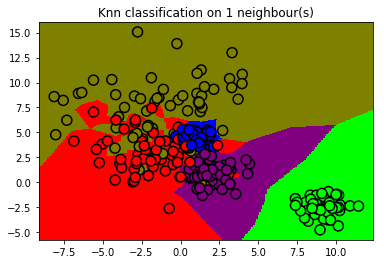

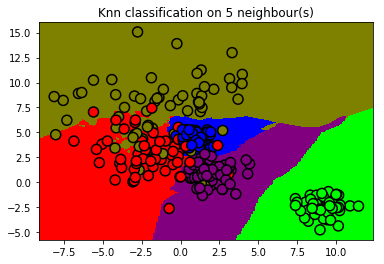

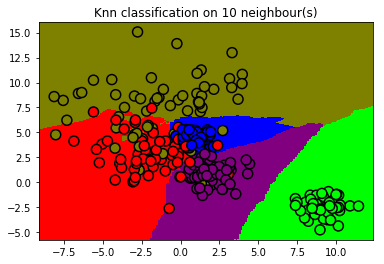

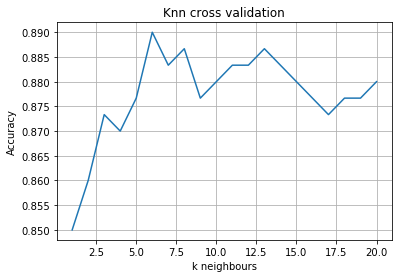

Best k neighbours:	 6
Best score:		 0.890


In [10]:
home_work = task_1(random_state=0)
home_work.proceed()

# or calling each method manually

#home_work.sampling()
#home_work.cluster_visualisation()
#home_work.searching_best_knn()